In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn


In [ ]:
#df = pd.read_excel(r"C:\Users\Nach\Desktop\TFM\datos\datos_limpios\dataset_ventas.xlsx")
df = pd.read_excel("/content/dataset_ventas.xlsx")

In [ ]:
#Convertimos los valores meteorológicos a formato float previamente sustituyendo las comas por puntos
df['prec'] = [x.replace(',','.').replace('Ip', '0') for x in df['prec']]
df['tmax'] = [x.replace(',','.') for x in df['tmax']]

In [ ]:
df = df.astype({'fecha': 'datetime64[ns]','mes': 'int', 'dia': 'int', 'dia_semana': 'int','prec': 'float', 'tmax': 'float',  'ventas': 'float'}, copy=False)
df = df.drop({'mes', 'dia'}, axis = 1)
df.head()

fecha  festivo  dia_semana  prec  tmax  ventas
0 2021-09-04        0           5   0.0  30.6   247.0
1 2021-09-05        0           6   0.0  32.7   172.0
2 2021-09-08        0           2   0.0  28.0    20.0
3 2021-09-09        0           3   0.0  27.1     5.0
4 2021-09-10        0           4   0.0  28.2    76.0

In [ ]:
# Data Exploration

class DistributionPlots:
        
    def HistogramPlot(df):
        Histogram = df.hist(color = 'cornflowerblue')
        
    def BoxPlot(df):
        boxPlot = df.boxplot()
        
class CorrelationPlots:
    
    def CorrelationWithoutResampling(df):
        
        sns.heatmap(df.corr(method = 'spearman'), vmax=1, vmin = -1, annot = True)
        plt.title('without resampling')
        plt.show()
        
    def CorrelationOverYear(df):
        
        sns.heatmap(df.resample('Y').mean().corr(method = 'spearman'), vmax = 1, vmin = -1, annot = True)
        plt.title('resampled over year')
        plt.show()

    def CorrelationOverMonth(df):
        
        sns.heatmap(df.resample('M').mean().corr(method = 'spearman'), vmax = 1, vmin = -1, annot = True)
        plt.title('resampled over month', size=15)
        plt.show()
        
    def CorrelationOverWeek(df):
        
        sns.heatmap(df.resample('W').mean().corr(method = 'spearman'), vmax = 1, vmin = -1, annot = True)
        plt.title('resampled over week', size = 15)
        plt.show()
        
    def CorrelationOverDay(df):
        
        sns.heatmap(df.resample('D').mean().corr(method = 'spearman'), vmax = 1, vmin = -1, annot = True)
        plt.title('resampled over day', size = 15)
        plt.show()

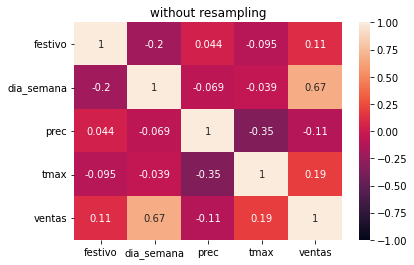

#################################################################################
Over Year.
#################################################################################


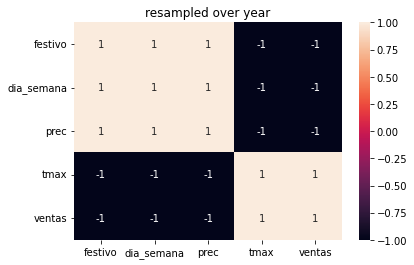

#################################################################################
Over Month.
#################################################################################


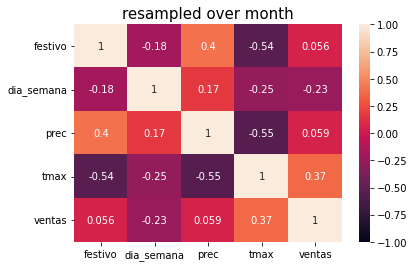

#################################################################################
Over Week.
#################################################################################


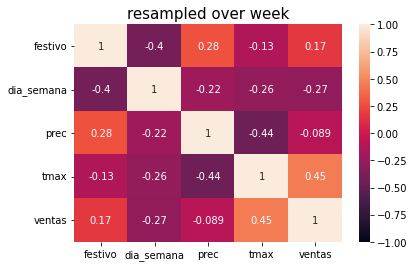

#################################################################################
Over Day.
#################################################################################


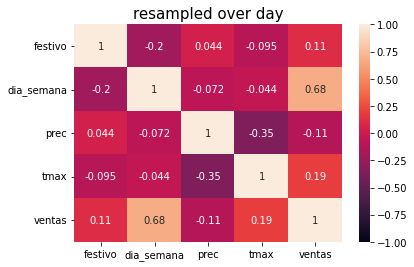

In [ ]:
CorrelationPlots.CorrelationWithoutResampling(df)
plt.show()

print("#################################################################################")
print("Over Year.")
print("#################################################################################")

dfGraphs =df.set_index('fecha')
CorrelationPlots.CorrelationOverYear(dfGraphs)
plt.show()

print("#################################################################################")
print("Over Month.")
print("#################################################################################")

CorrelationPlots.CorrelationOverMonth(dfGraphs)
plt.show()

print("#################################################################################")
print("Over Week.")
print("#################################################################################")

CorrelationPlots.CorrelationOverWeek(dfGraphs)
plt.show()

print("#################################################################################")
print("Over Day.")
print("#################################################################################")

CorrelationPlots.CorrelationOverDay(dfGraphs)
plt.show()




In [ ]:
#Dividimos el conjunto de datos 

df2_date = df[['fecha']]
df2_train =df[(df['fecha'] >= '2021-09-05') & (df['fecha'] <= '2022-10-31')]
df2_train = df2_train[['festivo', 'dia_semana','prec', 'tmax', 'ventas']]
df2_train.reset_index(inplace = True, drop=True)
df2_train

festivo  dia_semana  prec  tmax   ventas
0          0           6   0.0  32.7   172.00
1          0           2   0.0  28.0    20.00
2          0           3   0.0  27.1     5.00
3          0           4   0.0  28.2    76.00
4          0           5   0.0  27.7   341.40
..       ...         ...   ...   ...      ...
307        0           3   0.0  23.9    61.40
308        0           4   0.0  24.2   661.70
309        0           5   0.0  24.1  1311.50
310        0           6   0.0  20.4  1499.20
311        0           0   1.8  16.0   435.35

[312 rows x 5 columns]

In [ ]:
df2_test =df[(df['fecha'] >= '2022-10-31')]
df2_test = df2_test[['festivo', 'dia_semana','prec', 'tmax', 'ventas']]
df2_test.reset_index(inplace = True, drop=True)
df2_test

festivo  dia_semana  prec  tmax   ventas
0         0           0   1.8  16.0   435.35
1         1           1   0.0  21.2   953.40
2         0           2   0.0  21.9    22.85
3         0           3   0.6  18.6    15.35
4         0           4   0.0  16.6   481.90
5         0           5   0.0  18.4  1084.50
6         0           6   0.0  19.7  1355.95
7         0           1   1.1  16.7    16.55
8         1           2   4.5  17.3   844.05
9         0           3   0.0  18.5    30.60
10        0           4   1.7  17.2   543.35
11        0           5   2.3  20.6  1186.00
12        0           6   0.0  18.8  1022.30
13        0           1   3.4  16.9    33.20
14        0           2   0.8  14.0     8.90
15        0           3   0.0  17.7     2.50
16        0           4   0.2  14.3   368.60
17        0           5   0.0  11.8  1008.50
18        0           6   0.0  17.7  1395.15
19        0           1   1.3  13.4     1.65
20        0           3   3.3  14.2    87.35
21        0           4   0.0  14.9   385.25
22        0           5   0.0  13.9   564.55
23        0           6   4.4  14.3  1035.10
24        0           1   0.0  13.3     5.70
25        0           3   0.0  13.1     4.05
26        0           4   0.0  11.4    93.70
27        0           5   0.8   8.8   721.30
28        0           6   1.4   7.7   955.30
29        1           1   0.0  11.6   618.10
30        0           2   1.9  13.8     2.50
31        1           3  15.0  13.1   380.25
32        0           4   9.2  10.9    97.95
33        0           5   9.3  13.2   498.05
34        0           6   5.5   9.7   666.75
35        0           1  25.8  15.5     5.35
36        0           2  27.5  14.3     7.50
37        0           3   0.4  12.5    16.20
38        0           4   2.0  11.1   448.30
39        0           5   0.0  12.4  1157.80
40        0           6   0.0  11.3   622.80
41        0           1   9.4   9.2    12.85
42        0           2   0.0  14.7    20.70
43        0           3   0.2  15.7   317.10
44        0           4   0.0  12.6   514.00

En las redes neuronales es muy necesario escalar los valores de los data frames. Para ello podemos usar la función StandardScaler(). Debemos utilizar distintos objetos scalers para los datos de entrada y de salida.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2_train_scaled = sc.fit_transform(df2_train)
df2_train_scaled
print(df2_train_scaled.shape)

(312, 5)


In [ ]:
sc2 = StandardScaler()
df2_train_scaled_y = sc2.fit_transform(df2_train[['ventas']])
print(df2_train_scaled_y.shape)
df2_train_scaled_y

(312, 1)


array([[-2.73749568e-01],
       [-6.87516170e-01],
       [-7.28348400e-01],
       [-5.35075843e-01],
       [ 1.87382421e-01],
       [-1.04976349e-01],
       [-6.15651444e-01],
       [-4.74099712e-01],
       [ 7.62844655e-01],
       [ 7.73188820e-01],
       [-6.24090105e-01],
       [-6.79349724e-01],
       [-5.32353694e-01],
       [ 7.93332720e-01],
       [ 6.08731777e-03],
       [-6.65738980e-01],
       [-7.21815243e-01],
       [-6.92143823e-01],
       [ 3.79021689e-01],
       [ 2.68822043e+00],
       [-6.68662673e-02],
       [-7.25626251e-01],
       [-7.33792698e-01],
       [-6.65738980e-01],
       [-2.01068198e-01],
       [-5.42153429e-01],
       [-5.55764173e-01],
       [-6.63016831e-01],
       [ 1.94460007e-01],
       [-6.95682616e-01],
       [-4.23669290e-02],
       [ 2.54149661e+00],
       [ 2.95723939e-01],
       [-6.65466765e-01],
       [-2.46528081e-01],
       [ 2.02424910e-02],
       [ 9.04668602e-01],
       [-7.28348400e-01],
       [-1.6

In [ ]:
hops = 14
no_records = 312
no_cols = 6
X_train = []
y_train = []
for i in range(14,312):
  X_train.append(df2_train_scaled[i-14:i])
  y_train.append(df2_train_scaled_y[i][0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(298, 14, 5)
(298,)


Es necesario redimensionar el array a 3 dimensiones para entrenar un modelo RNN

In [ ]:
X_train_shape = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_train_shape.shape

(298, 14, 5)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True, input_shape = (14,5)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#model.fit(X_train_shape, y_train, epochs = 100, batch_size = 32)

In [ ]:
history = model.fit(X_train_shape, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
10/10 [==============================] - 5s 18ms/step - loss: 0.9506
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.8746
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 0.8386
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.8254
Epoch 5/100
10/10 [==============================] - 0s 20ms/step - loss: 0.8005
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.8048
Epoch 7/100
10/10 [==============================] - 0s 18ms/step - loss: 0.7652
Epoch 8/100
10/10 [==============================] - 0s 17ms/step - loss: 0.7354
Epoch 9/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6987
Epoch 10/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6408
Epoch 11/100
10/10 [==============================] - 0s 20ms/step - loss: 0.6171
Epoch 12/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5342
Epoch 13/100
10/10 [=====

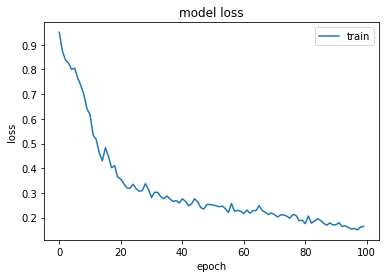

In [ ]:
#Mediante una gráfica con los errores, podemos revisar cómo ha sido el aprendizaje del modelo. 
#A priori tiene buen aspecto, lo que nos puede indicar que en caso de que salgan malos resultados, 
#una de las razones sería el hecho de contar con escasos datos históricos.
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc  = 'upper right')
plt.show()

In [ ]:
df1_train_last14 = df2_train.iloc[-14:]
df1_test_full =df2_test
full_df = pd.concat((df1_train_last14,df1_test_full), axis = 0)
print(full_df.shape)
full_df.head()

(59, 5)


festivo  dia_semana  prec  tmax   ventas
298        0           5   0.0  27.7  1550.10
299        0           6   3.2  26.4  1241.95
300        0           1   0.0  29.3    18.05
301        0           2   0.6  25.9    10.50
302        0           4   3.2  19.0    23.25

In [ ]:
#De la misma manera hacemos un reshape de los datos de test
full_df = sc.transform(full_df)
full_df.shape

(59, 5)

In [ ]:
hops = 14
no_records = 272
no_cols = 4
X_train_shape_pred = []
for i in range (14,59):
  X_train_shape_pred.append(full_df[i-14:i])
X_train_shape_pred = np.array(X_train_shape_pred)
print(X_train_shape_pred.shape)

(45, 14, 5)


Inbtentamos predecir las ventas y reescalarlo de vuelta al valor original mediante el método de la transformación inversa.

In [ ]:
len(X_train_shape_pred)

45

In [ ]:
ytest = model.predict(X_train_shape_pred)
y_final_pred = sc2.inverse_transform(ytest)
y_final_pred

2/2 [==============================] - 1s 9ms/step


array([[ 592.8206  ],
       [ 512.70483 ],
       [ 247.95164 ],
       [1387.5352  ],
       [2396.322   ],
       [2583.425   ],
       [2120.1675  ],
       [ 143.33395 ],
       [ 932.05164 ],
       [ 849.6689  ],
       [ 937.2695  ],
       [ 729.4824  ],
       [ 242.57004 ],
       [   8.461517],
       [ -51.510986],
       [ 179.91815 ],
       [ 387.60724 ],
       [ 785.89703 ],
       [ 772.9263  ],
       [ 155.9066  ],
       [ 326.86185 ],
       [ 154.52802 ],
       [ 307.26846 ],
       [ 148.85353 ],
       [  98.96159 ],
       [ 166.6854  ],
       [ 181.04773 ],
       [ 151.37637 ],
       [  61.219055],
       [  -8.595581],
       [-102.70053 ],
       [ -75.24066 ],
       [-102.30316 ],
       [ -85.353516],
       [ -88.59555 ],
       [ -93.87567 ],
       [ -44.811066],
       [  37.333374],
       [  66.841965],
       [  61.722397],
       [  41.324905],
       [  23.47136 ],
       [  59.706116],
       [ 115.05504 ],
       [ 168.78188 ]], dtype=flo

In [ ]:
#Convertimos los valores predecidos de la serie en un dataframe de nuevo
final_open_pred =pd.DataFrame(y_final_pred)
final_open_pred.columns = ['final_ventas_pred']
final_open_pred

final_ventas_pred
0          592.820618
1          512.704834
2          247.951645
3         1387.535156
4         2396.322021
5         2583.425049
6         2120.167480
7          143.333954
8          932.051636
9          849.668884
10         937.269470
11         729.482422
12         242.570038
13           8.461517
14         -51.510986
15         179.918152
16         387.607239
17         785.897034
18         772.926270
19         155.906601
20         326.861847
21         154.528015
22         307.268463
23         148.853531
24          98.961594
25         166.685394
26         181.047729
27         151.376373
28          61.219055
29          -8.595581
30        -102.700531
31         -75.240662
32        -102.303162
33         -85.353516
34         -88.595551
35         -93.875671
36         -44.811066
37          37.333374
38          66.841965
39          61.722397
40          41.324905
41          23.471359
42          59.706116
43         115.055038
44         168.781876

In [ ]:
#Por últmo concatenamos los valores actuales y los que hemos predecido

fully_final = pd.concat((final_open_pred, df2_test),axis = 1)
fully_final = fully_final[['ventas', 'final_ventas_pred','festivo',	'dia_semana',	'prec',	'tmax']]
fully_final

ventas  final_ventas_pred  festivo  dia_semana  prec  tmax
0    435.35         592.820618        0           0   1.8  16.0
1    953.40         512.704834        1           1   0.0  21.2
2     22.85         247.951645        0           2   0.0  21.9
3     15.35        1387.535156        0           3   0.6  18.6
4    481.90        2396.322021        0           4   0.0  16.6
5   1084.50        2583.425049        0           5   0.0  18.4
6   1355.95        2120.167480        0           6   0.0  19.7
7     16.55         143.333954        0           1   1.1  16.7
8    844.05         932.051636        1           2   4.5  17.3
9     30.60         849.668884        0           3   0.0  18.5
10   543.35         937.269470        0           4   1.7  17.2
11  1186.00         729.482422        0           5   2.3  20.6
12  1022.30         242.570038        0           6   0.0  18.8
13    33.20           8.461517        0           1   3.4  16.9
14     8.90         -51.510986        0           2   0.8  14.0
15     2.50         179.918152        0           3   0.0  17.7
16   368.60         387.607239        0           4   0.2  14.3
17  1008.50         785.897034        0           5   0.0  11.8
18  1395.15         772.926270        0           6   0.0  17.7
19     1.65         155.906601        0           1   1.3  13.4
20    87.35         326.861847        0           3   3.3  14.2
21   385.25         154.528015        0           4   0.0  14.9
22   564.55         307.268463        0           5   0.0  13.9
23  1035.10         148.853531        0           6   4.4  14.3
24     5.70          98.961594        0           1   0.0  13.3
25     4.05         166.685394        0           3   0.0  13.1
26    93.70         181.047729        0           4   0.0  11.4
27   721.30         151.376373        0           5   0.8   8.8
28   955.30          61.219055        0           6   1.4   7.7
29   618.10          -8.595581        1           1   0.0  11.6
30     2.50        -102.700531        0           2   1.9  13.8
31   380.25         -75.240662        1           3  15.0  13.1
32    97.95        -102.303162        0           4   9.2  10.9
33   498.05         -85.353516        0           5   9.3  13.2
34   666.75         -88.595551        0           6   5.5   9.7
35     5.35         -93.875671        0           1  25.8  15.5
36     7.50         -44.811066        0           2  27.5  14.3
37    16.20          37.333374        0           3   0.4  12.5
38   448.30          66.841965        0           4   2.0  11.1
39  1157.80          61.722397        0           5   0.0  12.4
40   622.80          41.324905        0           6   0.0  11.3
41    12.85          23.471359        0           1   9.4   9.2
42    20.70          59.706116        0           2   0.0  14.7
43   317.10         115.055038        0           3   0.2  15.7
44   514.00         168.781876        0           4   0.0  12.6

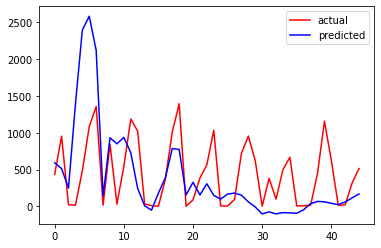

In [ ]:
plt.plot(fully_final['ventas'], label = 'actual', color = 'red')
plt.plot(fully_final['final_ventas_pred'], label = 'predicted', color = 'blue')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('R2 Score: ', r2_score(fully_final['ventas'], fully_final['final_ventas_pred']))
print('MAE: ', mean_absolute_error(fully_final['ventas'], fully_final['final_ventas_pred']))

R2 Score:  -0.9280498742438261
MAE:  428.74818467881937
